In [29]:
import pandas as pd
import csv
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import seaborn as sns
import networkx as nx

# HW2

## Question #1

For this question, we are going to use a data set of [the top grossing movies between 2007 and 2011](https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv).

1. Ingest the data as a pandas data frame.

2. Inspect the data and explain what it contains.

3. Count how many top grossing movies each studio made between 2007 and 2011, and visualize it as a bar chart.

4. Convert your bar chart above into a pie chart.

5. Make a cross-tabulation of Genres against the Year, and observe that the data contains errors. Correct the errors using 'replace' method then cross-tabulate again.

6. Draw a 'heat-map' of the corrected cross-tabulation you got above.

# Q1.1
## Ingesting the Data as a Pandas Data Frame
I have ingested my csv data using its url and then declared thousands and decimals so that I would not have problem with the numbers in the data.

In [30]:
url="https://gist.githubusercontent.com/tiangechen/b68782efa49a16edaf07dc2cdaa855ea/raw/0c794a9717f18b094eabab2cd6a6b9a226903577/movies.csv"
df=pd.read_csv(url,thousands='.', decimal=',')
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1747541667,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,109,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1211818182,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6267647029,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,652603178,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4382857143,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,44864475,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,53436218,40,$160.31,2008


# Q1.2
## Examining the Data
This data contains information about the top grossing movies made by several lead studios. Information such as: the movie's genre, percent of audience score, how much profit it made, percent of rotten tomatoes, worldwide gross and the year it was made.

# Q1.3
## Counting and Making a Bar Chart
In order to count how many top grossing movies were made by studios, I started with filtering my year range which is [2007,2011] even though the whole data contains movies made between those years and there was no need to filter, I still wanted to code it this way so that it would be understandable I am looking for certain production years.

Then I used **['Lead Studio'].value_counts()** so that I could see how many times a studio appeared on the data, meaning how many top grossing movies each studio made. At the end I have a pandas series with studio names and next to them are the number of top grossing movies



In [31]:
data=df[(df["Year"]<2011) & (df["Year"]>2007)]
d=data['Lead Studio'].value_counts()
d

Warner Bros.             10
Independent               9
Fox                       6
Universal                 6
Disney                    5
Summit                    5
Paramount                 3
Sony                      3
The Weinstein Company     2
Lionsgate                 1
New Line                  1
CBS                       1
Name: Lead Studio, dtype: int64

To create a bar chart I used **counter()** which does the same job as **.value_counts()** but the result is a counter collections. Then I assignes the list of **keys** on that collection (which are the lead studio names) to labels; and the **values** became the number of movies for each studio. Using **plt.bar** I created a bar chart with x and y values which lead to labels and values I just declared. 

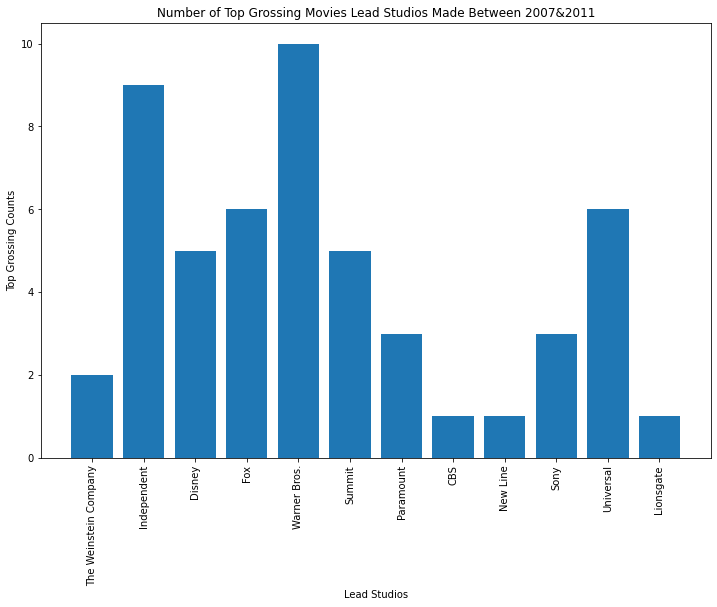

In [32]:
Counter(data['Lead Studio'])
raw = Counter(data['Lead Studio'])
labels = list(raw.keys())
values = raw.values()
plt.xticks(rotation=90)
plt.bar(labels,values)
plt.xlabel("Lead Studios")
plt.ylabel("Top Grossing Counts")
plt.title('Number of Top Grossing Movies Lead Studios Made Between 2007&2011');

# Q1.4
## Pie Chart
> The code of creating a pie chart was taken from Lecture 5 of class MAT381E by Atabey Kaygun.

Basically, a function called pieChart takes string 'Lead Studio' as an input and then by using data[col] it turns into a pandas series, a single column of lead studios in the data. Counter() helps us finding how many times a studio appears in the data and I assign it to raw. Then the labels are the studio names and parts of the pie chart are movie numbers percent for each studio.


In [33]:
def pieChart(col, ex=None):
    raw = Counter(data[col])
    ks = raw.keys()
    vs = 100*np.array(list(raw.values()))/sum(raw.values())
    plt.pie(vs, labels=ks, explode=ex)
    plt.show()

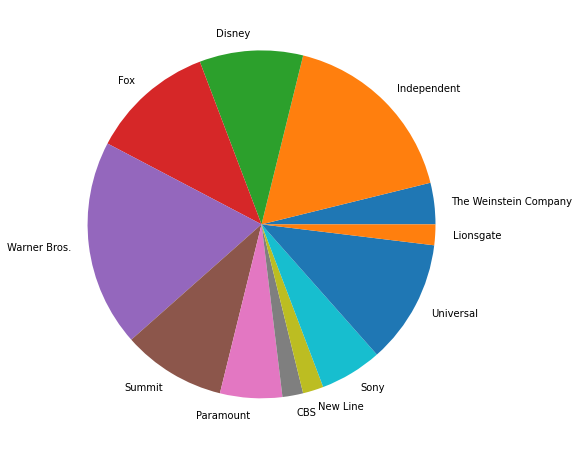

In [34]:
plt.rcParams['figure.figsize'] = 8,8
pieChart('Lead Studio')

# Q1.5
## Cross Tabulation
When I created a cross-tabulation of genres against the year I realised the typos on some of the genres made it inaccurate (such as: comedy and Comdy instead of Comedy ; Romence and romance instead of Romance). So I copied the original data to dfnew in order to change typos in a new environment then I fixed the typos by hand using **.replace()**. So now there are no typos left in the genre section of the data. When I re-created the cross tabulation, there were no errors left.

In [35]:
crosstab = pd.crosstab(df['Genre'], df['Year'])
crosstab

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comdy,0,1,0,0,0
Comedy,6,12,6,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,4,2,0,0,7
Romence,0,0,0,0,1
comedy,0,0,1,0,0


In [36]:
dfnew=df
dfnew=dfnew.replace('comedy','Comedy')
dfnew=dfnew.replace('Comdy','Comedy')
dfnew=dfnew.replace('Romence','Romance')
dfnew=dfnew.replace('romance','Romance')
dfnew

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1747541667,64,$41.94,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,109,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1211818182,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6267647029,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,Romance,Independent,84,652603178,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4382857143,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,44864475,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,53436218,40,$160.31,2008


In [37]:
crosstabnew = pd.crosstab(dfnew['Genre'], dfnew['Year'])
crosstabnew

Year,2007,2008,2009,2010,2011
Genre,,,,,
Action,0,0,0,1,0
Animation,0,1,0,1,2
Comedy,6,13,7,16,1
Drama,0,3,5,2,3
Fantasy,0,1,0,0,0
Romance,5,2,0,0,8


# Q1.6
## Heat Map
With the help of the cross tabulation I created a heat map representing the colors with Green and wrote the numbers on the heat map for a clearer understanding.

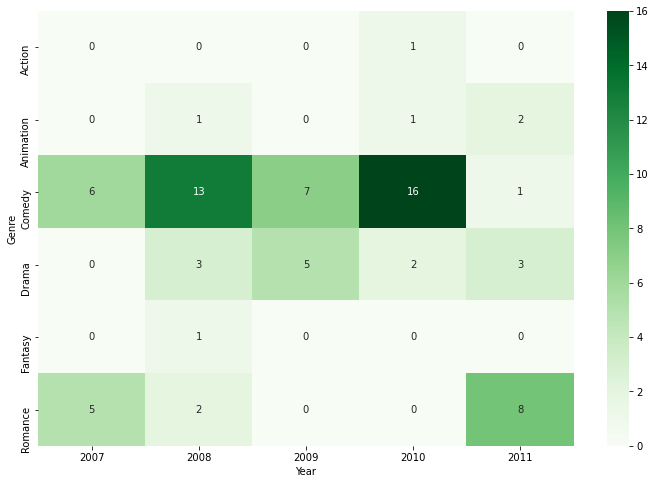

In [38]:
plt.rcParams['figure.figsize'] = 12,8
sns.heatmap(crosstabnew, cmap='Greens', annot=True);

## Question #2

For this question, we are going to use the [Open Flight Data](https://openflights.org/data.html#route).

1. Find the link for the data from the link I gave above. Ingest it as a pandas data frame.

2. Inspect it and explain what it contains.

3. Construct a data frame that contains 3 columns: source airport, target airport and the number of flights from source to target.

4. Filter the data frame and select only the routes that has 10 or more flights between them.

5. Construct a network using the `networkx` library that I used in our last lecture using the data frame you constructed in the previous step.

6. Visualize the network.

# Q2.1
## Ingesting the Data as a Pandas Data Frame
When I ingested the data from its url, I realized there were no labels so added them with the information from the source of the data. 

In [39]:
url_route="https://raw.githubusercontent.com/jpatokal/openflights/master/data/routes.dat"
route_df=pd.read_csv(url_route,header=None,names=['Airline','Airline ID','Source Airport','Source Airport ID','Destination Airport','Destination Airport ID','Codeshare','Stops','Equipment'])
route_df

,Airline,Airline ID,Source Airport,Source Airport ID,Destination Airport,Destination Airport ID,Codeshare,Stops,Equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


# Q2.2
## Examining the Data
This routes data contains information about flights made between two airports. It informs you which airline is flying from its source airport to destination airport with their ID's, the codeshare is showed with a "Y", number of stops on the flight and equipments used.   

# Q2.3
## Constructing a  New Data Frame
This new data frame created below, contains three columns: Name of the source and destination airport and number of flights made between them. By using **.valuecounts** I am making sure that if a pair of airports (the pair consists of one source airport and one destination airport) appears more the once in the original data frame instead of writing them over and over, write them once and add the number of times they appear next to it. 

For example the pair ORD and ATL (ORD being the source, ATL being the destination airport) appeared 20 time on the original data frame and now in the new data frame it only appears once with number 20 writing next to it. 

That **number** is the number of flights made in between two airports from source to destination.

In [40]:
new_df=route_df.value_counts(["Source Airport", "Destination Airport"]).rename_axis(['Source Airport','Destination Airport']).reset_index(name='Number of Flights')
new_df

,Source Airport,Destination Airport,Number of Flights
0,ORD,ATL,20
1,ATL,ORD,19
2,ORD,MSY,13
3,HKT,BKK,13
4,HKG,BKK,12
...,...,...,...
37590,IST,AQJ,1
37591,IST,AJI,1
37592,IST,AGP,1
37593,IST,ADF,1


# Q2.4
## Filtering The Data Frame
From my new data frame that i created in the previous step, I am choosing the routes that made 10 or more flights.

In [41]:
filtered_df=new_df[new_df["Number of Flights"]>=10]
filtered_df

,Source Airport,Destination Airport,Number of Flights
0,ORD,ATL,20
1,ATL,ORD,19
2,ORD,MSY,13
3,HKT,BKK,13
4,HKG,BKK,12
...,...,...,...
64,KUL,CGK,10
65,XIY,CKG,10
66,DPS,SIN,10
67,HGH,DLC,10


# Q2.5
## Constructing a Network
From my filtered data frame I am setting the source airport as the **source** and the Destination Airport as the **target** so the edges, connections between the airports will be created. I setup the size as 14,14 for it be big enough to see.

In [42]:
plt.rcParams['figure.figsize'] = 14,14
G=nx.from_pandas_edgelist(filtered_df, source='Source Airport', target='Destination Airport', edge_attr=None, create_using=None, edge_key=None)

# Q2.6 Visualizing the Network
After creating a network with edges and nodes, I visualize it by using **nx.draw_kamada_kawai** from the networkx library. Using this command is more convenient than using **nx.draw()**

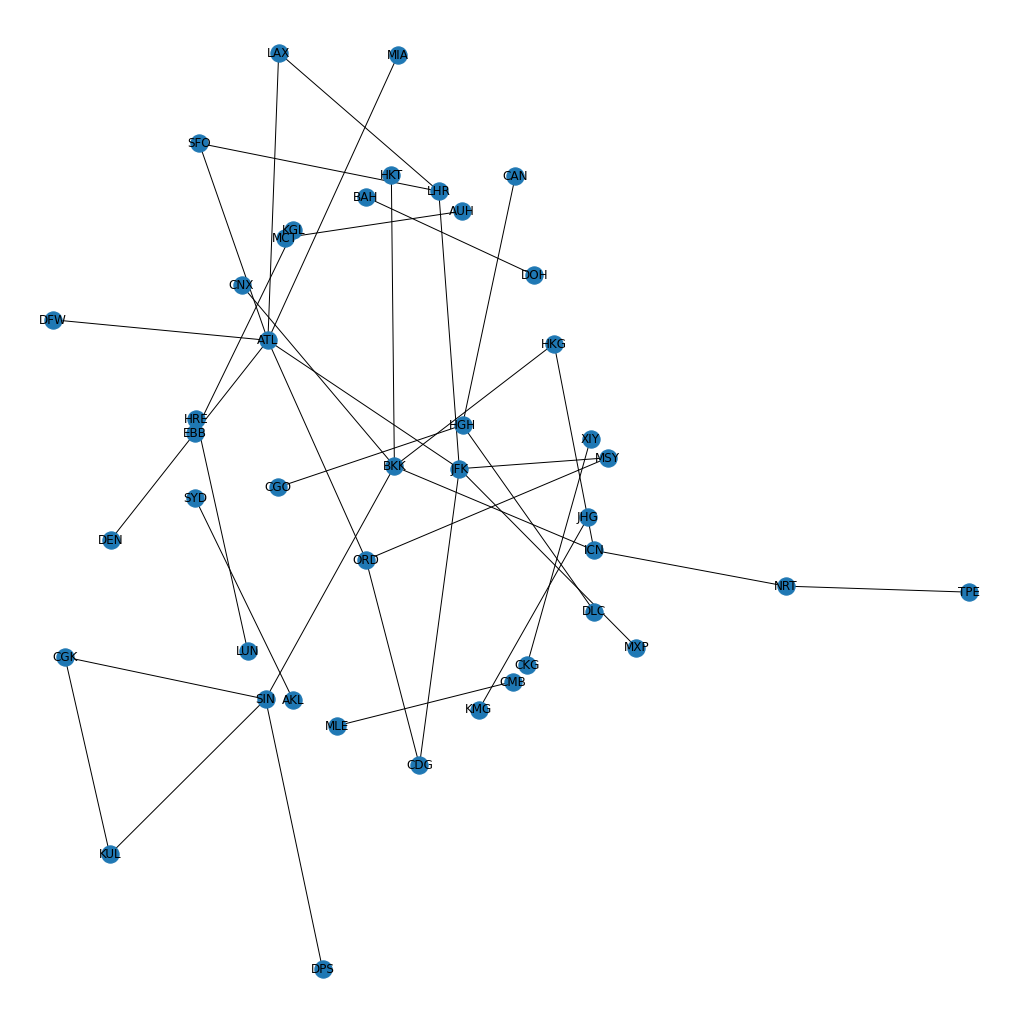

In [43]:
nx.draw_kamada_kawai(G,with_labels=True)

## Question #3

For this question we are going to use the [NBA Data](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/) that I have shown you in our last lecture.

1. Ingest the 2019 data as a pandas data frame.

2. Inspect it and explain what it contains.

3. Write a function that takes two arguments: the NBA data frame and a 'game type' argument which can be 'regular' or 'playoff'. The function must return another pandas data frame of list of players, the number of asists, blocks and rebounds for each player. Evaluate your function on both regular games, and then on playoff games.

4. Write another function that takes two argumentas as before: the NBA data frame and the game type. The function must return the list of teams and the number of wins during the regular season or the play offs as a data frame. Visualize the returned data frame as a bar chart for both regular games, and then on playoff games.

# Q3.1
## Ingesting the Data

In [44]:
url="https://sports-statistics.com/database/basketball-data/nba/2019-20_pbp.csv"
NBAdata=pd.read_csv(url)
NBAdata

,URL,GameType,Location,Date,Time,WinningTeam,Quarter,SecLeft,AwayTeam,AwayPlay,...,EnterGame,LeaveGame,TurnoverPlayer,TurnoverType,TurnoverCause,TurnoverCauser,JumpballAwayPlayer,JumpballHomePlayer,JumpballPoss,Unnamed: 40
0,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,720,NOP,Jump ball: D. Favors vs. M. Gasol (L. Ball gai...,...,NaN,NaN,NaN,NaN,NaN,NaN,D. Favors - favorde01,M. Gasol - gasolma01,L. Ball - balllo01,NaN
1,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,708,NOP,L. Ball misses 2-pt jump shot from 11 ft,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,Offensive rebound by D. Favors,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,707,NOP,D. Favors makes 2-pt layup at rim,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,/boxscores/201910220TOR.html,regular,Scotiabank Arena Toronto Canada,October 22 2019,8:00 PM,TOR,1,689,NOP,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
539260,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,29,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539261,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,20,LAL,D. Howard makes 3-pt jump shot from 30 ft (ass...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539262,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,15,LAL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
539263,/boxscores/202010110MIA.html,playoff,The Arena Bay Lake Florida,October 11 2020,7:30 PM,LAL,4,0,LAL,End of 4th quarter,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Q3.2
## Examining the Data
This NBA data set is based on its 2019-2020 season. The main idea is recording information and events about the games that are being played at the given date and time. The games' type, winners and locations are informed as well as certain events that are happening each quarter. This data set is a very detailed one that keeps track of NBA games. 

# Q3.3
## Player Performance Function
Player performance function takes a data and a game type as inputs. Then with **.query()** it scans the data to find the wanted game type and I assigned this new filtered data to players_df. We are looking to examine players assisting, blocking and rebounding so by using **.filter()** I have easily extracted those columns from my already filtered data with the wanted game type. 

This df_numbers data frame might contain a player's name several times making it crowded for us to work with. So for each column, I am using **.value_counts()** to avoid that problem. Now for example, d1, a pandas series, contains players' names who assisted along with how many times they assisted, I did this process for all three columns.

Then to combine 2 series (assister and blocker) I turned assister to a data frame and with **.join()** I added blocker. Using 'outer' was necessay becase there may be some players who have assisted but not blocked and vice versa. The result is a data frame but I still need to add rebounder. So to add a series to a data frame I used **.merge()** again with outer style and finally reached a data frame of players and their activities such as how many times they rebounded.

In [45]:
def player_performance(dataFrame,gameType):
    players_df = dataFrame.query('GameType == @gameType')
    df_numbers = players_df.filter(['Assister','Blocker','Rebounder'],axis=1)
    d1=df_numbers["Assister"].value_counts()
    d2=df_numbers["Blocker"].value_counts()
    d3=df_numbers["Rebounder"].value_counts()
    
    finaldata=d1.to_frame().join(d2,how='outer')
    finaldata=finaldata.merge(d3.rename('Rebounder'), left_index=True, right_index=True,how='outer')
    
    return finaldata

In [46]:
player_performance(NBAdata,'playoff')

,Assister,Blocker,Rebounder
A. Burks - burksal01,7.0,3.0,15.0
A. Caruso - carusal01,59.0,12.0,48.0
A. Cleveland - clevean01,NaN,NaN,1.0
A. Coffey - coffeam01,4.0,NaN,NaN
A. Davis - davisan02,73.0,30.0,204.0
...,...,...,...
V. Oladipo - oladivi01,10.0,NaN,13.0
V. Poirier - poirivi01,1.0,NaN,NaN
W. Gabriel - gabriwe01,4.0,2.0,10.0
W. Iwundu - iwundwe01,4.0,2.0,11.0


In [47]:
player_performance(NBAdata,'regular')

,Assister,Blocker,Rebounder
A. Aminu - aminual01,21.0,8.0,87.0
A. Baynes - baynear01,67.0,23.0,237.0
A. Bradley - bradlav01,63.0,5.0,115.0
A. Burks - burksal01,189.0,17.0,282.0
A. Caruso - carusal01,124.0,18.0,123.0
...,...,...,...
Z. Collins - colliza01,16.0,5.0,70.0
Z. LaVine - lavinza01,254.0,28.0,289.0
Z. Norvell - norveza01,3.0,NaN,6.0
Z. Smith - smithzh01,2.0,NaN,2.0


# Q3.4
## Number of Wins Function
**win_counts** function takes a data and a game type as inputs. Then, it creates data frame "a" which contains the chosen game type and an 'End of Game' string on the AwayPlay column. Then from this data frame a I am grouping team names with their wins by using **.value_counts()**. A team's name might be on the winning team column several times troughout the game, what is important is the result, who is the winner at the end of the game. That is why it is necessary to pick the rows with the 'End of Game' string, to get an accurate result in terms of how many times a team won.

Then, by using **plot.bar** I have created a bar chart that shows how many times each team won during a certain game type.

In [48]:
def win_counts(data,gametype):
    a = data[(data["GameType"]==gametype) & (data['AwayPlay']=='End of Game')]
    b = a['WinningTeam'].value_counts()
    return b

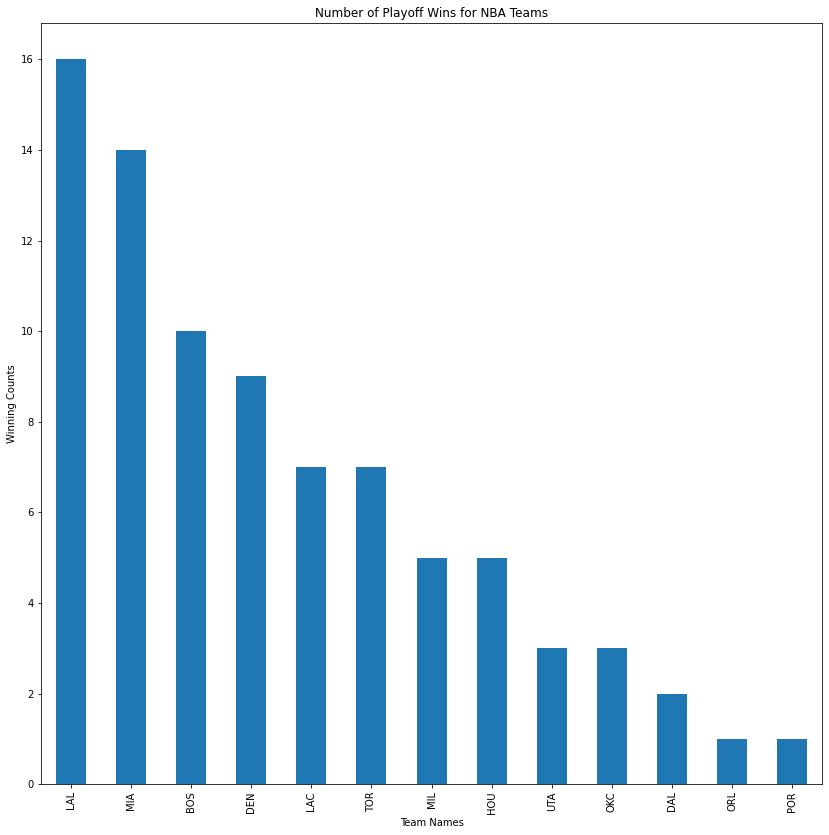

In [49]:
numberofwins = win_counts(NBAdata,'playoff')
numberofwins.plot.bar(x=None, y=None)
plt.xlabel("Team Names")
plt.ylabel("Winning Counts")
plt.title('Number of Playoff Wins for NBA Teams');

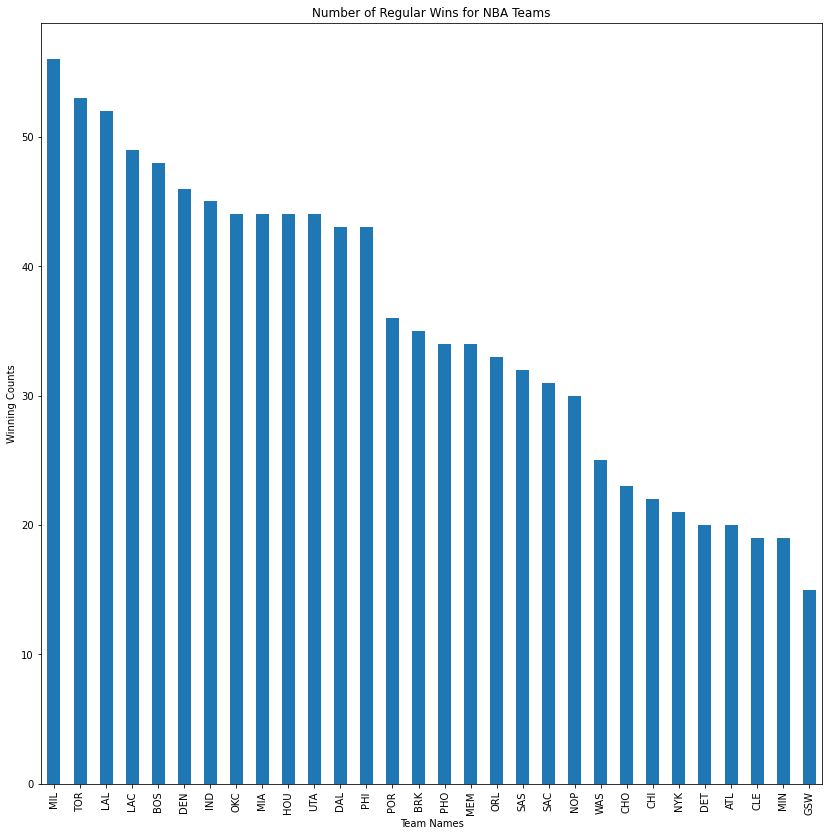

In [50]:
numberofwins = win_counts(NBAdata,'regular')
numberofwins.plot.bar(x=None, y=None)
plt.xlabel("Team Names")
plt.ylabel("Winning Counts")
plt.title('Number of Regular Wins for NBA Teams');